**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 9**

**Problem 9.6**


**This problem represents the first step in the design of a grid-connected PV system installed on the rooftop of a dwelling at a certain location. For this example, we will select El Cairo (Egypt).**

**Using pvlib and retrieving the Typical Meteorological Year (TYM), find the optimum inclination for the PV generator that maximizes the reference yield. The generator is assumed to be oriented towards the Equator.**

We will use the packages [pvlib](https://pvlib-python.readthedocs.io/en/stable/), [pandas](https://pandas.pydata.org/) and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results. We will also use the package [pytz](https://pypi.org/project/pytz/) to determine the time zone of Egypt.

In [49]:
import pvlib
import pandas as pd
import matplotlib.pyplot as plt
import pytz

We start by defining the location, date, and time. 

In [50]:
# El Cairo, Egypt
lat, lon =  31.233, 30.033
altitude = 23

tz = pytz.country_timezones('EG')[0]

# location
location = pvlib.location.Location(lat, lon, tz=tz)

orientation = 180 # pvlib sets orientation origin at North -> South=0

We retrieve typical meteorological year (TMY) data from PVGIS.

In [51]:
tmy, _, _, _ = pvlib.iotools.get_pvgis_tmy(latitude=lat, longitude=lon, map_variables=True)

tmy.index = tmy.index.tz_convert(tz) #use local time

We retrieve the PV modules and inverter specifications from the database at the [NREL SAM (System Advisory Monitoring)](https://sam.nrel.gov/). 

For the temperature parameters, we assume an open rack glass-glass configuration.

In [52]:
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')

sapm_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')

module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']

inverter = sapm_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

temperature_model_parameters = pvlib.temperature.TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

We can check the different modules and invertes included in the SAM database.

In [53]:
sandia_modules

,Advent_Solar_AS160___2006_,Advent_Solar_Ventura_210___2008_,Advent_Solar_Ventura_215___2009_,Aleo_S03_160__2007__E__,Aleo_S03_165__2007__E__,Aleo_S16_165__2007__E__,Aleo_S16_170__2007__E__,Aleo_S16_175__2007__E__,Aleo_S16_180__2007__E__,Aleo_S16_185__2007__E__,...,Panasonic_VBHN235SA06B__2013_,Trina_TSM_240PA05__2013_,Hanwha_HSL60P6_PA_4_250T__2013_,Suniva_OPT300_72_4_100__2013_,Canadian_Solar_CS6X_300M__2013_,LG_LG290N1C_G3__2013_,Sharp_NDQ235F4__2013_,Solar_Frontier_SF_160S__2013_,SolarWorld_Sunmodule_250_Poly__2013_,Silevo_Triex_U300_Black__2014_
Vintage,2006,2008,2009,2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),2007 (E),...,2013,2013,2013,2013,2013,2013,2013,2013,2013,2014
Area,1.312,1.646,1.646,1.28,1.28,1.378,1.378,1.378,1.378,1.378,...,1.26,1.63,1.65,1.93,1.91,1.64,1.56,1.22,1.68,1.68
Material,mc-Si,mc-Si,mc-Si,c-Si,c-Si,mc-Si,mc-Si,mc-Si,mc-Si,mc-Si,...,a-Si / mono-Si,mc-Si,mc-Si,c-Si,c-Si,c-Si,mc-Si,CIS,mc-Si,c-Si
Cells_in_Series,72,60,60,72,72,50,50,50,50,50,...,72,60,60,72,72,60,60,172,60,96
Parallel_Strings,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Isco,5.564,8.34,8.49,5.1,5.2,7.9,7.95,8.1,8.15,8.2,...,5.8738,8.8449,8.5935,8.5753,8.6388,9.8525,8.6739,2.0259,8.3768,5.771
Voco,42.832,35.31,35.92,43.5,43.6,30.0,30.1,30.2,30.3,30.5,...,52.0042,36.8926,36.8075,44.2921,43.5918,39.6117,36.8276,112.5048,36.3806,68.5983
Impo,5.028,7.49,7.74,4.55,4.65,7.08,7.23,7.38,7.53,7.67,...,5.5383,8.2955,8.0822,7.963,8.1359,9.2473,8.1243,1.8356,7.6921,5.383
Vmpo,32.41,27.61,27.92,35.6,35.8,23.3,23.5,23.7,23.9,24.1,...,43.1204,29.066,29.2011,35.0837,34.9531,31.2921,29.1988,86.6752,28.348,55.4547
Aisc,0.000537,0.00077,0.00082,0.0003,0.0003,0.0008,0.0008,0.0008,0.0008,0.0008,...,0.0005,0.0004,0.0004,0.0006,0.0005,0.0002,0.0006,0.0001,0.0006,0.0003


In [54]:
sapm_inverters

,ABB__MICRO_0_25_I_OUTD_US_208__208V_,ABB__MICRO_0_25_I_OUTD_US_240__240V_,ABB__MICRO_0_3_I_OUTD_US_208__208V_,ABB__MICRO_0_3_I_OUTD_US_240__240V_,ABB__MICRO_0_3HV_I_OUTD_US_208__208V_,ABB__MICRO_0_3HV_I_OUTD_US_240__240V_,ABB__PVI_10_0_I_OUTD_x_US_208_y__208V_,ABB__PVI_10_0_I_OUTD_x_US_480_y_z__480V_,ABB__PVI_12_0_I_OUTD_x_US_480_y__480V_,ABB__PVI_3_0_OUTD_S_US__208V_,...,Zigor__Sunzet_3_TL_US__240V_,i_Energy__GT260__240V_,iPower__SHO_1_1__120V_,iPower__SHO_2_0__240V_,iPower__SHO_2_5__240V_,iPower__SHO_3_0__240V_,iPower__SHO_3_5__240V_,iPower__SHO_4_6__208V_,iPower__SHO_4_8__240V_,iPower__SHO_5_2__240V_
Vac,208,240,208,240,208,240,208,480,480,208,...,240,240,120,240,240,240,240,208,240,240
Pso,2.089607,2.240412,1.846506,1.950539,1.769444,1.843781,46.863808,67.790878,62.554672,18.166279,...,36.033405,2.530101,22.09536,24.465775,42.776474,31.682003,64.774162,54.570091,85.145699,62.486748
Paco,250.0,250.0,300.0,300.0,300.0,300.0,10000.0,10000.0,12000.0,3000.0,...,3180.0,230.0,1100.0,2000.0,2500.0,3000.0,3500.0,4600.0,4800.0,5200.0
Pdco,259.588593,259.492065,311.66925,311.580872,312.421082,312.004578,10488.306641,10295.979492,12358.804688,3142.30127,...,3315.654297,245.630447,1194.094849,2161.879639,2632.835693,3205.932617,3641.840332,4797.806641,4968.027832,5382.856934
Vdco,40.0,40.0,40.0,40.0,45.0,45.0,320.0,362.0,370.0,310.0,...,375.0,40.0,182.0,199.0,218.0,222.5,263.0,254.0,263.0,280.0
C0,-0.000041,-0.000039,-0.000033,-0.000034,-0.000045,-0.000035,-0.000003,-0.000001,-0.000001,-0.000008,...,-0.000008,0.000062,-0.000021,-0.000013,-0.000014,-0.000008,-0.000009,-0.000006,-0.000006,-0.000005
C1,-0.000091,-0.000132,-0.000192,-0.000256,-0.000196,-0.000227,-0.000036,-0.000049,-0.000056,-0.000011,...,-0.000075,-0.000098,0.000057,0.000055,0.000061,0.000036,0.000035,0.000028,0.000034,0.000044
C2,0.000494,0.002418,0.000907,0.002453,0.001959,-0.000526,0.000305,-0.00052,-0.001437,0.000999,...,0.000544,0.000231,0.002001,0.001703,0.002053,0.001708,0.001417,0.001381,0.000586,0.00126
C3,-0.013171,-0.014926,-0.031742,-0.028223,-0.023725,-0.041214,-0.002351,-0.003855,-0.007112,-0.000287,...,-0.000338,0.121032,0.000623,0.000315,0.00153,0.00086,0.001218,0.000889,0.000195,0.000367
Pnt,0.075,0.075,0.09,0.09,0.09,0.09,0.1,0.4,0.4,0.1,...,0.954,0.069,0.33,0.6,0.75,0.9,1.05,1.38,1.44,1.56


We calculate the Sun's coordinates and calculate the irradiance on the plane of array (POA)

In [58]:
# calculate Sun's coordinates
solar_position = location.get_solarposition(times=tmy.index)

#list of potential tilt angle
tilts=range(0,90,1)

annual_energy = pd.Series(index=tilts, dtype=float)
#annual_irradiation = pd.Series(index=tilts, dtype=float)

for tilt in tilts: 
    # calculate irradiante at the plane of the array (poa)
    poa_irradiance = pvlib.irradiance.get_total_irradiance(surface_tilt=tilt,
                                                           surface_azimuth=orientation,
                                                           dni=tmy['dni'],
                                                           ghi=tmy['ghi'],
                                                           dhi=tmy['dhi'],
                                                           solar_zenith=solar_position['apparent_zenith'],
                                                           solar_azimuth=solar_position['azimuth'])
    
    #save annual irradiation on the plane of array (POA) in kWh
    #annual_irradiation[tilt]=0.001*poa_irradiance['poa_global'].sum()

    #calculate airmass 
    airmass = pvlib.atmosphere.get_relative_airmass(solar_position['apparent_zenith'])
    pressure = pvlib.atmosphere.alt2pres(altitude)
    am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure)
    
    #calculate the angle of incidence (aoi)
    aoi = pvlib.irradiance.aoi(surface_tilt=tilt,
                               surface_azimuth=orientation,
                               solar_zenith=solar_position['apparent_zenith'],
                               solar_azimuth=solar_position['azimuth'])

    #calculate the effective irradiance
    cell_temperature = pvlib.temperature.sapm_cell(poa_irradiance['poa_global'],
                                                   tmy["temp_air"],
                                                   tmy["wind_speed"],
                                                   **temperature_model_parameters,)

    effective_irradiance = pvlib.pvsystem.sapm_effective_irradiance(poa_irradiance['poa_direct'],
                                                                    poa_irradiance['poa_diffuse'],
                                                                    am_abs,
                                                                    aoi,
                                                                    module)
    #calculate the DC and AC energy generation in every hour
    dc = pvlib.pvsystem.sapm(effective_irradiance, cell_temperature, module)

    ac = pvlib.inverter.sandia(dc['v_mp'], dc['p_mp'], inverter)

    #save annual energy yield in kWh
    annual_energy[tilt] = 0.001*ac.sum()


We can plot the annual energy yield as a function of the tilt angle.

Text(0.5, 0, 'Tilt angle')

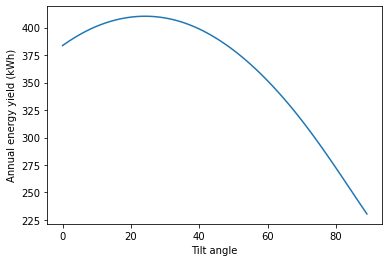

In [59]:
annual_energy.plot()
plt.ylabel('Annual energy yield (kWh)')
plt.xlabel('Tilt angle')

The annual energy yield is maximized for a tilt angle of 24 degrees.

In [60]:
annual_energy.idxmax()

24